# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

$$ z = \beta_0 + \beta_1x$$

$$ z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$
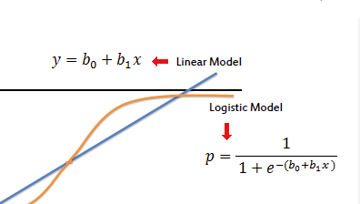

## Sigmoid Fonksiyon

$$ \phi(z) = \frac{1}{1+e^{-z}}$$

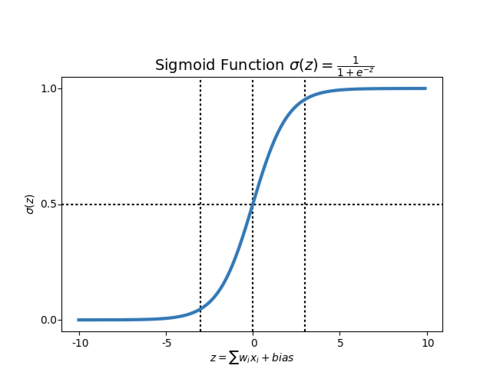

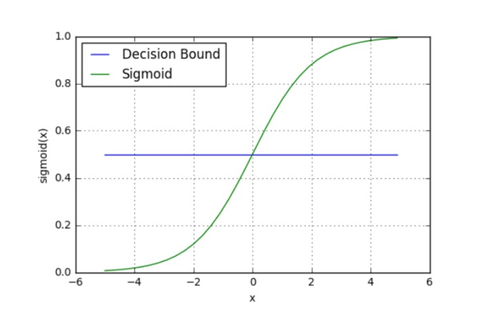

##### Logistic Regression'un Varsayımları (Assumptions)

1- Sonuç değişkeni (target, label, class) kategoriktir

2- Girdiler (değişkenler) arasında korelasyon bulunmaz

3- Lineer bir ilişki ile z değeri hesaplandığı için x ile z arasında lineer bir ilişki varsayar

4- Logistic Regresyon'un başarılı olması için yüksek miktarda veri lazımdır. Yani çok fazla veriye ihtiyaç duyar. Lineer ilişki olduğu için az veri ile çok büyük oranda yanılma riski var.

(2- Gözlemler (row, veriler) birbirinden bağımsızdır)

##### Multicollinearty olmamasi önemli !

## Notlar
- Lojistik regresyon anlaşılması kolay (user-friendly) ve hesaplama açısından verimlidir (computationally efficient).

- Karmaşık ilişkileri modellemekte sınırlı olabilir ve bazı varsayımlara (assumptions) ihtiyaç duyar.

- Daha karmaşık ilişkiler için karar ağaçları (decision trees), rastgele ormanlar (random forests) veya derin öğrenme (deep learning) gibi modeller tercih edilebilir.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
pip install matplotlib==3.5.2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("hearing_test.csv")

In [4]:
df.head()

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

**bütün islemleri sonuclari 1 almaya göre ayarlayacagiz. dersi geçemeyenler bulacaksak yine 1 olur**

# Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe().T

count   mean    std    min    25%    50%    75%    max
age            5000.000 51.609 11.287 18.000 43.000 51.000 60.000 90.000
physical_score 5000.000 32.760  8.170 -0.000 26.700 35.300 38.900 50.000
test_result    5000.000  0.600  0.490  0.000  0.000  1.000  1.000  1.000

In [7]:
# classificasyon verilerinde balance - unbalance kontrolü yapmaliyiz

df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

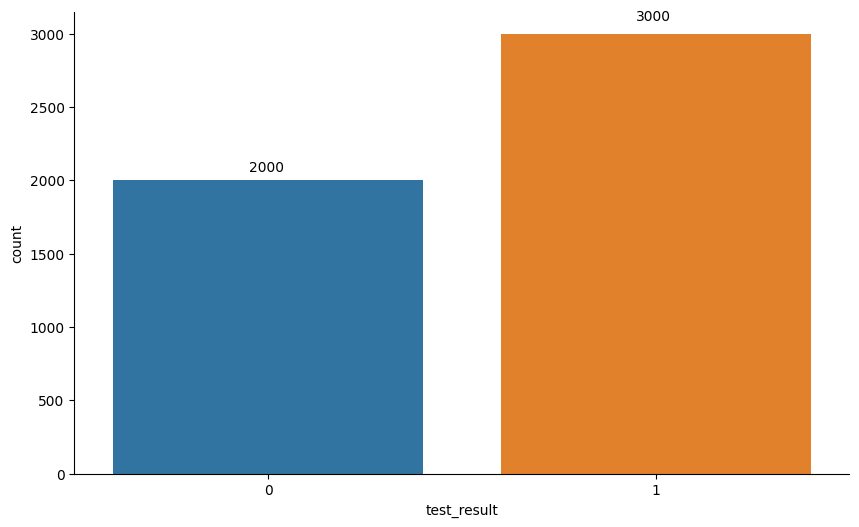

In [8]:
ax = sns.countplot(df["test_result"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.35, p.get_height() * 1.03));

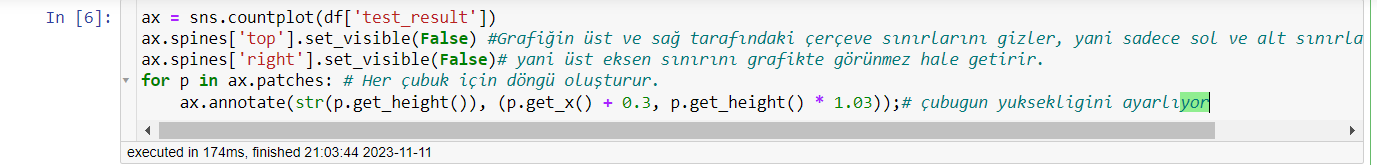

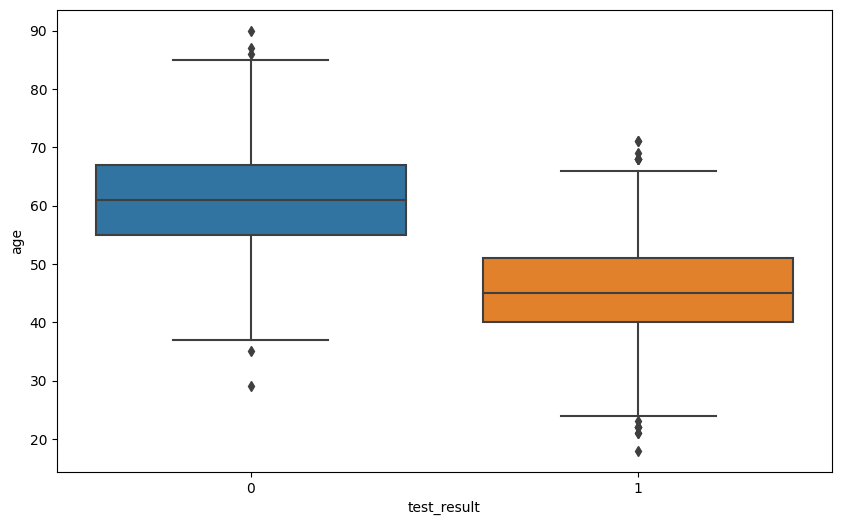

In [9]:
sns.boxplot(x = "test_result", y = "age", data=df);

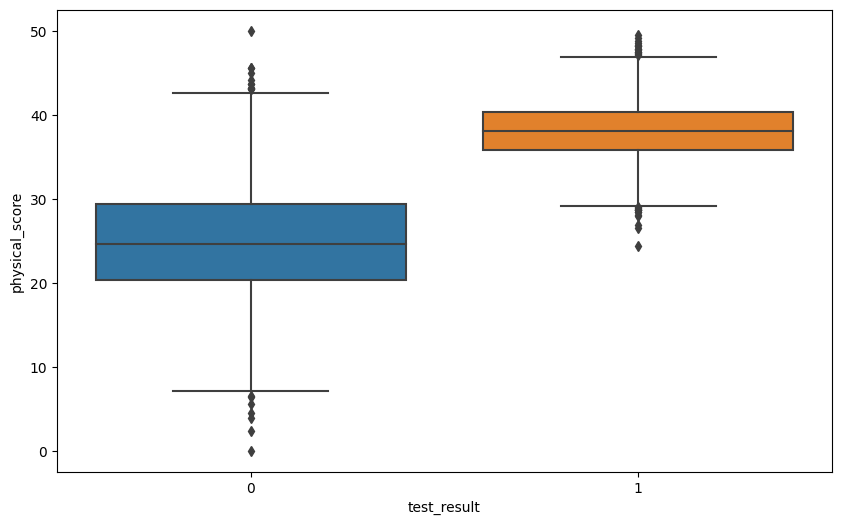

In [10]:
sns.boxplot(x = "test_result", y = "physical_score", data=df);

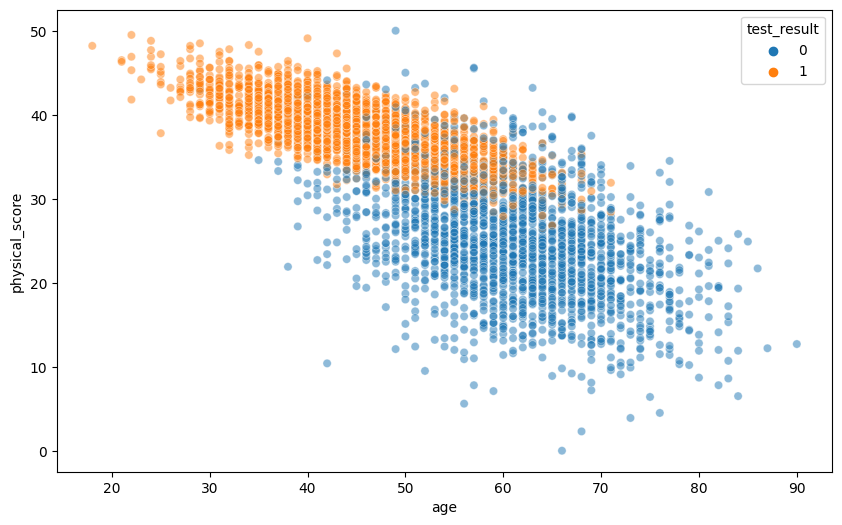

In [11]:
sns.scatterplot(x= "age", y = "physical_score", data = df, hue = "test_result", alpha=0.5);

In [12]:
sns.scatterplot(y= "age", x = "physical_score", data = df, hue = "test_result", alpha=0.5);

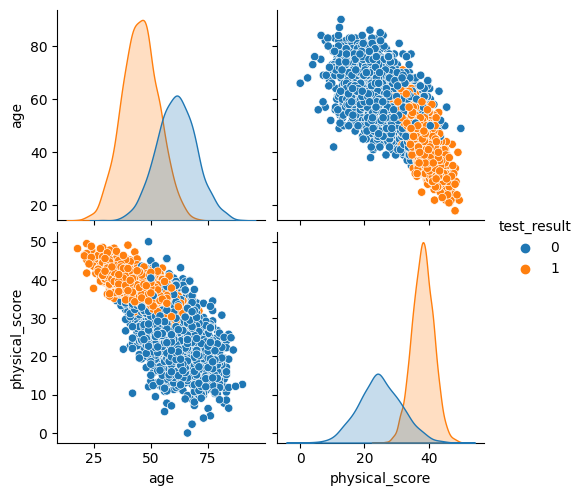

In [13]:
sns.pairplot(df, hue="test_result");

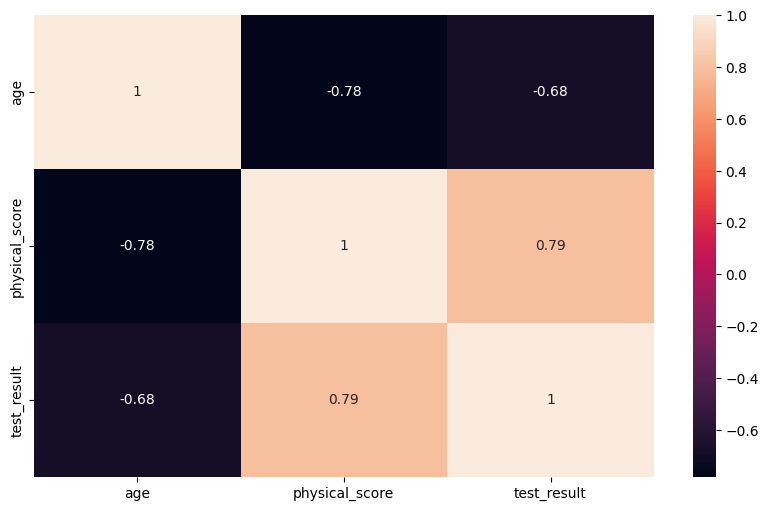

In [14]:
sns.heatmap(df.corr(), annot = True);

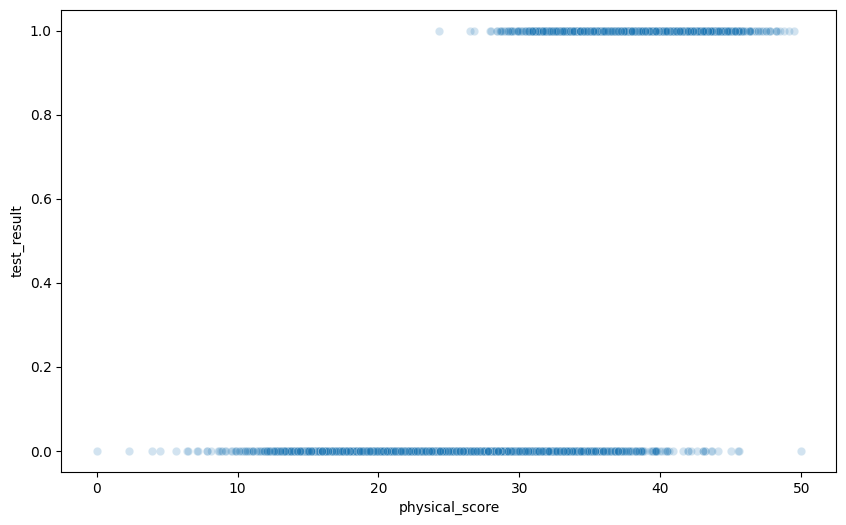

In [15]:
sns.scatterplot(x="physical_score", y="test_result", data=df, alpha=0.2);

In [16]:
sns.scatterplot(x="age", y="test_result", data=df, alpha=0.2);

# Easy Exploratory Data Analysis (EDA)

In [17]:
#  pip install sweetviz dataprep dtale

In [18]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("Report.html")


                                             |                                             | [  0%]   00:00 ->…

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
from dataprep.eda import create_report
report = create_report(df)
report.show_browser()

  0%|                                                                                          | 0/512 [00:00<…

In [20]:
from dataprep.eda import create_report
report = create_report(df)
report.save("Report2_of_hearing_test.html")

  0%|                                                                                          | 0/512 [00:00<…

Report has been saved to Report2_of_hearing_test.html!


In [21]:
import dtale
import dtale.app as dtale_app
# D-Tale'i başlatmak için
d = dtale.show(df)
d.open_browser()

# Train | Test Split

In [22]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Scaling

In [25]:
scaler = StandardScaler() # scale siz, min-max scale ve standartscale ile model denenir ve en iyi sonucla devam edilir

In [26]:
X_train_scaled = scaler.fit_transform(X_train) # sadece train datasi fit ve transform yapilir, yoksa data sizmasi
X_test_scaled = scaler.transform(X_test)       # test datasi icin sadece transform

## Modelling

In [27]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [28]:
log_model = LogisticRegression()

In [29]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [30]:
df

age  physical_score  test_result
0    33.000          40.700            1
1    50.000          37.200            1
2    52.000          24.700            0
3    56.000          31.000            0
4    35.000          42.900            1
...     ...             ...          ...
4995 73.000           3.900            0
4996 57.000          33.900            1
4997 49.000          34.500            1
4998 38.000          46.400            1
4999 48.000          38.500            1

[5000 rows x 3 columns]

In [31]:
log_model.coef_  # feature larin target a etkisini gösteriyor. deger büyükse etki büyük, + ve - de yönü gösterir

array([[-0.903313  ,  3.48541689]])

In [32]:
log_model.intercept_  # b0 degeri

array([0.47858594])

In [33]:
df.head()

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

In [34]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [35]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba   # ilk deger 0 olma olasiligi, ikinci satir 1 olma olasiligi

array([[0.02440335, 0.97559665],
       [0.02676148, 0.97323852],
       [0.98932428, 0.01067572],
       ...,
       [0.0240031 , 0.9759969 ],
       [0.94898369, 0.05101631],
       [0.22360865, 0.77639135]])

In [36]:
y_pred_proba.shape

(1000, 2)

In [37]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

age  physical_score  test_result
1718 39.000          37.800            1
2511 45.000          38.700            1
345  56.000          21.800            0
2521 40.000          44.000            1
54   64.000          25.400            0
...     ...             ...          ...
3900 71.000          23.300            0
3753 51.000          32.600            1
3582 42.000          38.400            1
2392 52.000          24.800            0
3343 54.000          34.900            1

[1000 rows x 3 columns]

In [38]:
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data

age  physical_score  test_result  pred_proba
1718 39.000          37.800            1       0.976
2511 45.000          38.700            1       0.973
345  56.000          21.800            0       0.011
2521 40.000          44.000            1       0.998
54   64.000          25.400            0       0.026
...     ...             ...          ...         ...
3900 71.000          23.300            0       0.006
3753 51.000          32.600            1       0.622
3582 42.000          38.400            1       0.976
2392 52.000          24.800            0       0.051
3343 54.000          34.900            1       0.776

[1000 rows x 4 columns]

In [39]:
test_data["pred"] = y_pred
test_data

age  physical_score  test_result  pred_proba  pred
1718 39.000          37.800            1       0.976     1
2511 45.000          38.700            1       0.973     1
345  56.000          21.800            0       0.011     0
2521 40.000          44.000            1       0.998     1
54   64.000          25.400            0       0.026     0
...     ...             ...          ...         ...   ...
3900 71.000          23.300            0       0.006     0
3753 51.000          32.600            1       0.622     1
3582 42.000          38.400            1       0.976     1
2392 52.000          24.800            0       0.051     0
3343 54.000          34.900            1       0.776     1

[1000 rows x 5 columns]

In [40]:
test_data.sample(5)

age  physical_score  test_result  pred_proba  pred
4494 74.000          14.900            0       0.000     0
2366 71.000          13.200            0       0.000     0
1995 59.000          34.300            1       0.643     1
1001 77.000          18.300            0       0.000     0
1135 56.000          35.000            1       0.755     1

In [41]:
df8 = test_data[test_data["test_result"] != test_data["pred"]]
df8

age  physical_score  test_result  pred_proba  pred
2371 46.000          36.400            0       0.926     1
618  63.000          33.400            1       0.470     0
2145 65.000          35.200            0       0.621     1
3200 60.000          32.900            1       0.477     0
1726 46.000          36.700            0       0.934     1
...     ...             ...          ...         ...   ...
2420 60.000          32.500            1       0.434     0
3917 48.000          33.400            0       0.747     1
2452 61.000          33.600            0       0.532     1
1845 50.000          31.900            0       0.569     1
4273 58.000          33.900            0       0.622     1

[83 rows x 5 columns]

In [42]:
# test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1)) ]

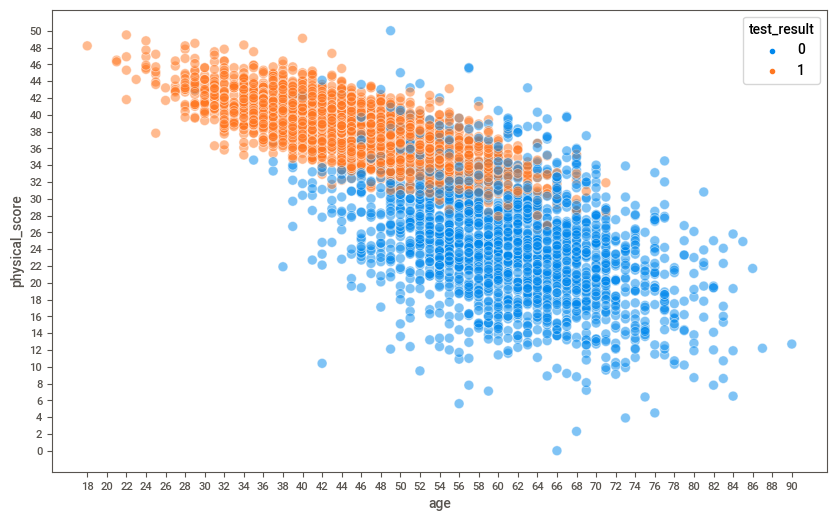

In [43]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x="age", y="physical_score", data = df, hue = "test_result", alpha = 0.5, s = 50)

plt.xticks(range(int(df["age"].min()), int(df["age"].max())+1,2))
plt.yticks(range(int(df["physical_score"].min()), int(df["physical_score"].max())+1,2))

plt.show()

In [44]:
"""
# False Negatives      from fatih Calik
false_negatives_mask = (test_data['test_result']==1) & (test_data['pred_proba']<=0.5)
false_positives_mask = (test_data['test_result']==0) & (test_data['pred_proba']>0.5)
false_predictions = test_data[false_negatives_mask | false_positives_mask]
print(f"False Predictions: {len(false_predictions)}")
false_predictions
Bu kod ise cift scatterplot icin
plt.figure(figsize = (10, 6))
sns.scatterplot(x="age", y="physical_score", data = false_predictions, hue = "test_result", s = 50)
plt.xticks(range(int(df["age"].min()), int(df["age"].max())+1,2))
plt.yticks(range(int(df["physical_score"].min()), int(df["physical_score"].max())+1,2))
sns.scatterplot(x="age", y="physical_score", data = df, hue = "test_result", alpha = 0.1, s = 50)
plt.show()
"""

'\n# False Negatives      from fatih Calik\nfalse_negatives_mask = (test_data[\'test_result\']==1) & (test_data[\'pred_proba\']<=0.5)\nfalse_positives_mask = (test_data[\'test_result\']==0) & (test_data[\'pred_proba\']>0.5)\nfalse_predictions = test_data[false_negatives_mask | false_positives_mask]\nprint(f"False Predictions: {len(false_predictions)}")\nfalse_predictions\nBu kod ise cift scatterplot icin\nplt.figure(figsize = (10, 6))\nsns.scatterplot(x="age", y="physical_score", data = false_predictions, hue = "test_result", s = 50)\nplt.xticks(range(int(df["age"].min()), int(df["age"].max())+1,2))\nplt.yticks(range(int(df["physical_score"].min()), int(df["physical_score"].max())+1,2))\nsns.scatterplot(x="age", y="physical_score", data = df, hue = "test_result", alpha = 0.1, s = 50)\nplt.show()\n'

## Model Performance on Classification Tasks

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

**Doğruluk (Accuracy):** Modelin doğru tahmin ettiği örneklerin oranıdır. Doğruluğun maksimum değeri 1 olabilir. 
Formül:

Doğruluk = (TP + TN) / (TP + TN + FP + FN)

Burada;

TP (True Positive): doğru pozitif sayısı

TN (True Negative): doğru negatif sayısı

FP (False Positive): yanlış pozitif sayısı

FN (False Negative): yanlış negatif sayısıdır.

In [46]:
accuracy_score(y_test, y_pred)

0.917

In [47]:
log_model.score(X_test_scaled, y_test)  # Accuracy ile ayni deger verir. cikan skor

0.917

**Hassasiyet (Precision):** Pozitif olarak sınıflandırılan örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Hassasiyet modelin pozitif sınıfı doğru sınıflandırma yeteneğini ölçmektedir. Aşağıdaki formülden de anlaşılacağı üzere hassasiyet pozitif olarak doğru bilinen tahminlerin tüm pozitif tahminlere oranı olarak ifade edilebilir.

Formül:

Hassasiyet = TP / (TP + FP)

TP (True Positive): doğru pozitif sayısı

FP (False Positive): yanlış pozitif sayısı

In [48]:
precision_score(y_test, y_pred)

0.9126365054602185

**Duyarlılık (Recall):** Gerçek pozitif örneklerin ne kadarının pozitif olarak sınıflandırıldığını gösterir. Aşağıdaki formül incelendiğinde duyarlılık, pozitif olarak doğru tahmin edilenlerin gerçek pozitiflere oranı olarak ifade edilebilir.

Formül:

Duyarlılık = TP / (TP + FN)

TP (True Positive): doğru pozitif sayısı

FN (False Negative): yanlış negatif sayısıdır.

In [49]:
recall_score(y_test, y_pred)

0.9558823529411765

**F1 Skor (F1 Score):** F1 Skor ise Hassasiyet (Precision) ve Duyarlılık (Recall) skorlarının harmonik ortalamasıdır.

Formül:

F1 Skor = 2 * ((Precision * Recall) / (Precision + Recall))

Precision: Hassasiyet

Recall: Duyarlılık

In [50]:
f1_score(y_test, y_pred)

0.933758978451716

**Log Kaybı (Log Loss):** Modelin tahmin ettiği olasılıkların gerçek olasılıklardan ne kadar uzak olduğunu ölçer. Model gerçek değerin olasılığına yakın bir tahminde bulunursa log kaybı düşük değer alırken gerçek değerin olasılığından uzaklaştıkça artan bir değer verir.

Formül:

Log Kaybı = -(1/N) * Σ(y * log(p) + (1-y) * log(1-p))

N: gözlem sayısı

y: gerçek değer olasılığı

p: ise tahmini değer olasılığı

Örnek: Bir örneğin gerçek değeri “A” ise ve model “A” için olasılık 0,8 tahmin ederken, gerçek olasılık 1 ise log kaybı -log(0,8) = 0,2231'dir.

In [51]:
log_loss(y_test, y_pred)

2.8667632182336784

In [52]:

"""
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

"""

'\nfrom sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix\n\n'

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


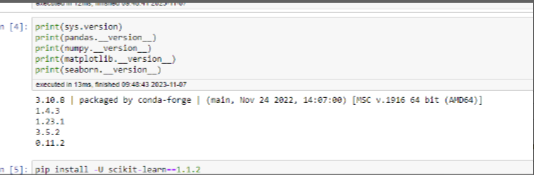

In [54]:
confusion_matrix(y_test, y_pred)

array([[332,  56],
       [ 27, 585]], dtype=int64)

In [55]:
# !pip install scikit-plot          Alternatif cizim

# import scikitplot as skplt

# skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

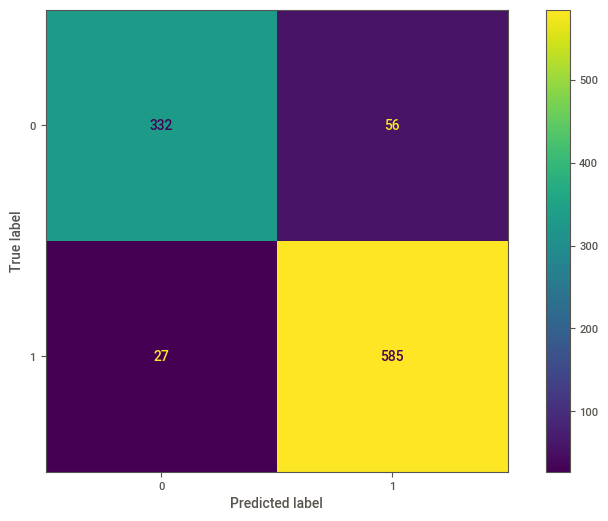

In [56]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [57]:
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);    Fatih hocamin alternatif kodu

In [58]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize="true");

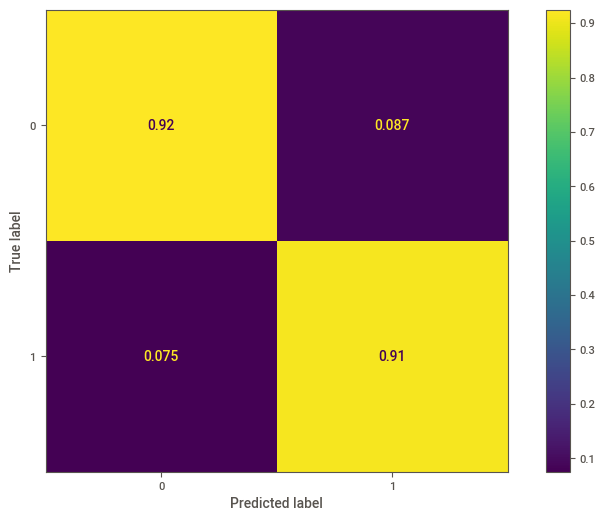

In [59]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize="pred");

In [64]:
TP=585    # bu ve alttaki 2 satir anlamak icin
TN=332
FP=56
FN=27

In [65]:
acc= (TP + TN) / (TP + TN + FP + FN)
prec= TP / (TP + FP)
recc= TP / (TP + FN)
F1= 2 * ((prec * recc) / (prec + recc))

In [66]:
print("Accuracy : {:.2f}".format(acc))
print("Precision: {:.2f}".format(prec))
print("Recall   : {:.2f}".format(recc))
print("F1 Score : {:.2f}".format(F1))

Accuracy : 0.92
Precision: 0.91
Recall   : 0.96
F1 Score : 0.93


In [68]:
TP=10
TN=70
FP=0
FN=10

acc= (TP + TN) / (TP + TN + FP + FN)
prec= TP / (TP + FP)
recc= TP / (TP + FN)
F1= 2 * ((prec * recc) / (prec + recc))

print("Accuracy : {:.2f}".format(acc))
print("Precision: {:.2f}".format(prec))
print("Recall   : {:.2f}".format(recc))
print("F1 Score : {:.2f}".format(F1))

Accuracy : 0.89
Precision: 1.00
Recall   : 0.50
F1 Score : 0.67


In [70]:
def calculate_metrics(TP, TN, FP, FN):  #Vahit hocamin katkilari ile!!
    """
    Calculate classification metrics based on the given parameters.

    Parameters:
    - TP (int): True Positives
    - TN (int): True Negatives
    - FP (int): False Positives
    - FN (int): False Negatives

    Returns:
    None (prints the calculated metrics)
    """

    acc = (TP + TN) / (TP + TN + FP + FN)
    prec = TP / (TP + FP)
    recc = TP / (TP + FN)
    F1 = 2 * ((prec * recc) / (prec + recc))

    print("Accuracy : {:.2f}".format(acc))
    print("Precision: {:.2f}".format(prec))
    print("Recall   : {:.2f}".format(recc))
    print("F1 Score : {:.2f}".format(F1))

# Example usage
calculate_metrics(10, 70, 0, 10)

Accuracy : 0.89
Precision: 1.00
Recall   : 0.50
F1 Score : 0.67


In [60]:
print(classification_report(y_test, y_pred)) # yukardaki ciktiya göre, sistem 1 e göre calisiyor..

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       388
           1       0.91      0.96      0.93       612

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



In [71]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1612
           1       0.91      0.95      0.93      2388

    accuracy                           0.92      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.92      0.92      0.91      4000



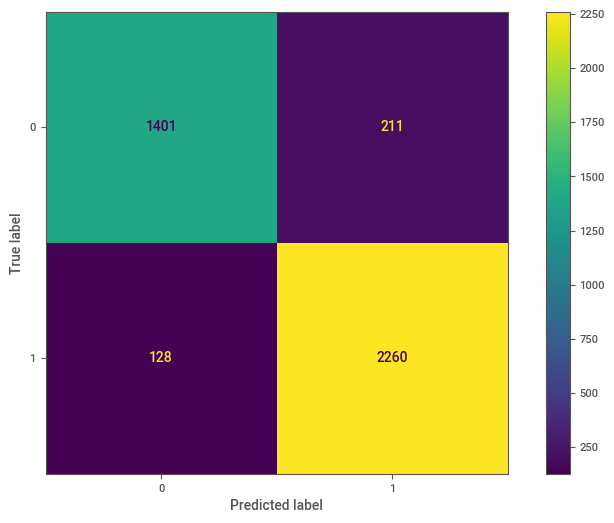

In [73]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

# Cross Validate (CV)

In [74]:
from sklearn.model_selection import cross_validate

In [75]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [80]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy",
                                                                  "precision",
                                                                  "recall",
                                                                  "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.005       0.002          0.920           0.912        0.958    0.934
2      0.004       0.002          0.930           0.907        0.983    0.944
3      0.005       0.001          0.948           0.943        0.971    0.957
4      0.004       0.002          0.938           0.946        0.950    0.948
5      0.004       0.003          0.900           0.923        0.908    0.916
6      0.004       0.002          0.905           0.914        0.929    0.921
7      0.004       0.002          0.902           0.891        0.954    0.921
8      0.003       0.003          0.900           0.903        0.933    0.918
9      0.003       0.003          0.902           0.903        0.937    0.920
10     0.004       0.002          0.907           0.901        0.950    0.925

In [81]:
df_scores.mean()[2:]

test_accuracy    0.915
test_precision   0.914
test_recall      0.947
test_f1          0.930
dtype: float64

In [83]:
print("Test set")
print(classification_report(y_test, y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

Test set
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       388
           1       0.91      0.96      0.93       612

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000

Train Set

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1612
           1       0.91      0.95      0.93      2388

    accuracy                           0.92      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.92      0.92      0.91      4000





data %10 - 90 olarak paylastirilirsa

# ROC (Receiver Operating Curve) and AUC (Area Under Curve)

ROC (Receiver Operating Characteristic) ve AUC (Area Under the Curve) sınıflandırma modellerinin performansını değerlendirmek için kullanılan önemli araçlardır. İkili sınıflandırma problemlerinde yaygın olarak kullanılırlar ve modelin sınıfları ne kadar iyi ayırt ettiğini gösterirler.
**ROC (Receiver Operating Characteristic)**
ROC, sınıflandırma modelinin farklı eşik değerlerindeki performansını gösteren bir grafiktir. ROC eğrisi, gerçek pozitif oranı (True Positive Rate, TPR) ile yanlış pozitif oranı (False Positive Rate, FPR) arasındaki ilişkiyi görselleştirir.
- True Positive Rate (TPR), aynı zamanda Recall veya Hassasiyet olarak da bilinir ve şöyle hesaplanır: TPR = TP / (TP + FN). Burada TP, gerçek pozitifler ve FN, yanlış negatiflerdir.
- False Positive Rate (FPR) ise şöyle hesaplanır: FPR = FP / (FP + TN). Burada FP, yanlış pozitifler ve TN, gerçek negatiflerdir.
ROC eğrisi, modelin farklı eşik değerlerinde (sınıflandırma sınırı) TPR ve FPR değerlerini çizer. İdeal bir model, TPR'yi maksimize ederken FPR'yi minimize eder, bu da ROC eğrisinin sol üst köşeye yakın olmasını sağlar.
**AUC (Area Under the Curve)**
AUC, ROC eğrisinin altında kalan alanın büyüklüğüdür ve genellikle 0 ile 1 arasında bir değer alır. AUC, modelin rastgele seçilen pozitif bir örneği rastgele seçilen negatif bir örneğe tercih etme olasılığını ölçer.
- Mükemmel bir modelin AUC değeri 1'dir: Bu, modelin tüm pozitif ve negatif örnekleri mükemmel bir şekilde ayırt ettiği anlamına gelir.
- Rastgele bir tahmin yapan modelin AUC değeri yaklaşık 0.5 olacaktır: Bu, modelin pozitif ve negatif örnekleri rastgele tahmin ettiği anlamına gelir.

AUC, bir modelin farklı sınıflandırma eşiklerindeki genel performansını tek bir sayı ile özetler ve bu nedenle model karşılaştırmalarında sıklıkla kullanılır. Yüksek bir AUC değeri, modelin genellikle pozitif ve negatif sınıfları iyi bir şekilde ayırt ettiğini gösterir.

In [84]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

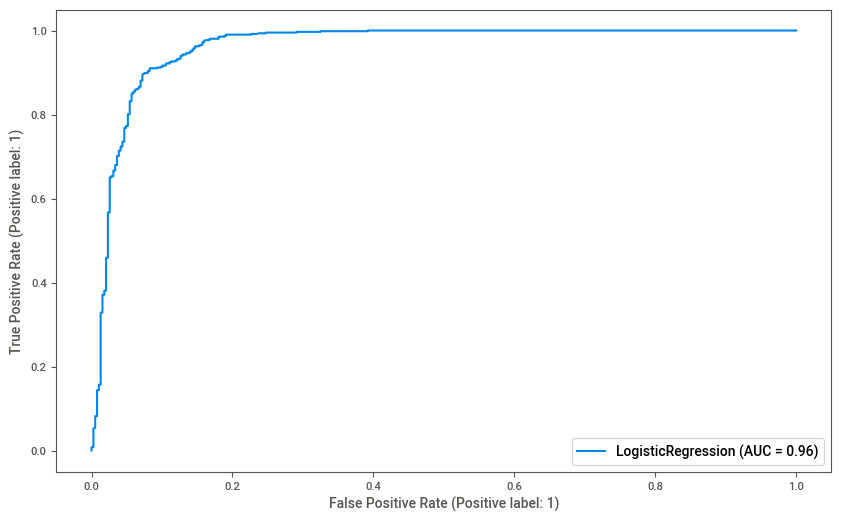

In [86]:
plot_roc_curve(log_model, X_test_scaled, y_test);

Threshold'u azalttığımızda recall artar FP de artabilir. Pozitifleri kaçırmak istemiyorsak ve FP'leri de başka şekillerle test ederek yola devam edebiliyorsak bu tercih edilebilir.
Threshold'u artırmak FN'yi artırabilir, precision'da artacaktır. Bunu false olanların telafisi başka şekilde yapılabileceği zaman kullanabiliriz.
Diyebiliyorum.  Cumali hocamin yorumu

In [87]:
roc_auc_score(y_test, y_pred_proba[:, 1]) # olmasi gereken hesaplama sekli

0.9625151607034568

In [88]:
roc_auc_score(y_test, y_pred) # yanlis hesap bagdattan döner

0.9057762280169801

## Precission Recall Curve

imbalanced data ise bunla devam edebiliriz.

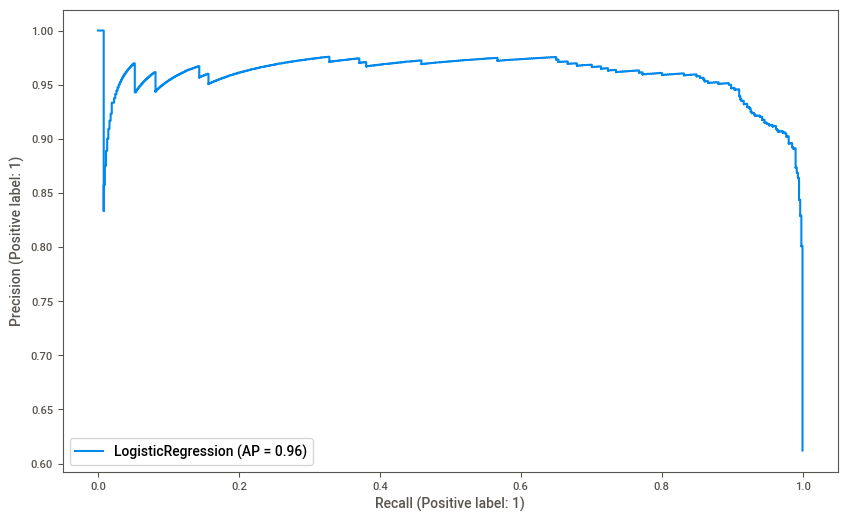

In [89]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

# Final Model and Model Deployment

In [90]:
scaler = StandardScaler().fit(X)    # X datami komple scale yaptik

In [91]:
import pickle

In [92]:
pickle.dump(scaler, open("scaler_hearing", "wb"))

In [93]:
X_scaled = scaler.transform(X)

In [94]:
final_model = LogisticRegression().fit(X_scaled, y)

In [95]:
pickle.dump(final_model, open("final_model_hearing", "wb"))

## New Observation

In [96]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [97]:
sample = pd.DataFrame(my_dict)
sample

age  physical_score
0   20              50
1   30              30
2   40              20
3   50              10
4   60               5

In [98]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [99]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [100]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [101]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [102]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:, 1]
sample

age  physical_score  pred  pred_proba
0   20              50     1       1.000
1   30              30     1       0.730
2   40              20     0       0.016
3   50              10     0       0.000
4   60               5     0       0.000